In [144]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 

In [155]:
df = pd.read_csv('train_data_mod.csv')
df 

BookingID  LeadTime  ArrivalYear  ArrivalMonth  ArrivalDate  \
0              1        10         2018             3           31   
1              2       116         2018             2           28   
2              3        11         2018             7           25   
3              4         3         2017             9           12   
4              5        28         2018             3            7   
...          ...       ...          ...           ...          ...   
29015      29016         2         2018            11           21   
29016      29017        18         2018             4           12   
29017      29018         8         2017             9           29   
29018      29019        20         2018             9           18   
29019      29020       274         2018             7           31   

       NumWeekendNights  NumWeekNights  MealPlan  Parking  RoomType  \
0                     0              1         1        0         1   
1                     2              1         1        0         1   
2                     1              2         1        0         1   
3                     0              1         1        0         1   
4                     1              3         1        0         1   
...                 ...            ...       ...      ...       ...   
29015                 1              2         1        0         1   
29016                 0              2         0        0         1   
29017                 0              3         1        0         1   
29018                 2              2         1        0         1   
29019                 2              1         1        0         2   

       NumAdults  NumChildren  MarketSegment  RepeatedGuest  \
0              1            0              2              0   
1              1            0              1              0   
2              2            1              1              0   
3              2            0              1              0   
4              2            0              0              0   
...          ...          ...            ...            ...   
29015          1            0              1              0   
29016          2            0              1              0   
29017          1            0              2              0   
29018          1            0              0              0   
29019          2            0              1              0   

       NumPrevCancellations  NumPreviousNonCancelled  AvgRoomPrice  \
0                         0                        0         95.00   
1                         0                        0         61.00   
2                         0                        0        129.75   
3                         0                        0        152.00   
4                         0                        0         87.00   
...                     ...                      ...           ...   
29015                     0                        0        100.67   
29016                     0                        0        119.00   
29017                     0                        0         65.00   
29018                     0                        0         90.00   
29019                     0                        0         96.50   

       SpecialRequests  BookingStatus  
0                    0              0  
1                    0              0  
2                    1              1  
3                    3              1  
4                    0              1  
...                ...            ...  
29015                1              1  
29016                1              1  
29017                0              1  
29018                0              0  
29019                1              1  

[29020 rows x 19 columns]

: 

<Axes: >

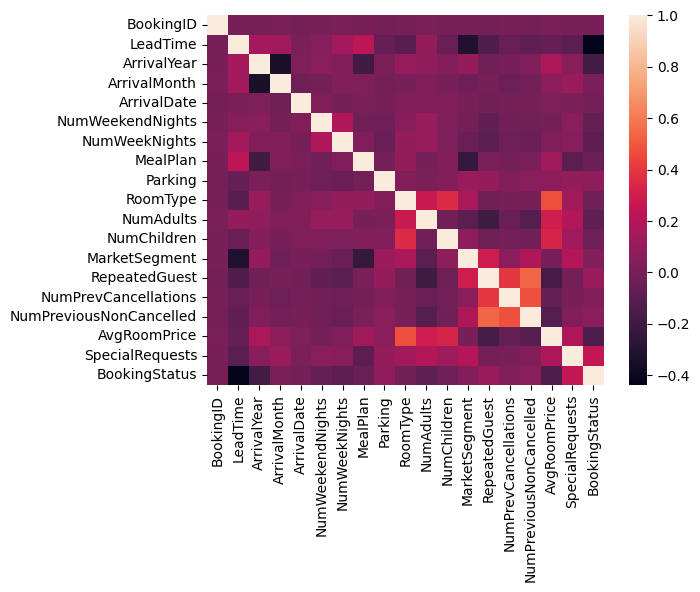

In [146]:
import seaborn as sns
sns.heatmap(df.corr())

In [147]:
# X = df.drop(['BookingStatus', 'BookingID','MealPlan','Parking','RoomType','MarketSegment'], axis=1) # features
X = df.drop(['BookingStatus', 'BookingID', 'NumPrevCancellations','NumPreviousNonCancelled','RepeatedGuest'], axis=1) # features
y = df['BookingStatus'] # target value


In [148]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [150]:
X_train.values

array([[7.0000e+00, 2.0180e+03, 6.0000e+00, ..., 0.0000e+00, 7.2250e+01,
        0.0000e+00],
       [1.4400e+02, 2.0180e+03, 7.0000e+00, ..., 1.0000e+00, 1.3770e+02,
        0.0000e+00],
       [1.0200e+02, 2.0170e+03, 1.0000e+01, ..., 0.0000e+00, 1.0150e+02,
        0.0000e+00],
       ...,
       [5.0000e+00, 2.0180e+03, 5.0000e+00, ..., 2.0000e+00, 1.1000e+02,
        1.0000e+00],
       [2.7100e+02, 2.0180e+03, 9.0000e+00, ..., 0.0000e+00, 1.0133e+02,
        1.0000e+00],
       [2.3000e+01, 2.0180e+03, 9.0000e+00, ..., 1.0000e+00, 1.0010e+02,
        2.0000e+00]])

In [151]:
pipelines = {
    # 'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    # 'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    # 'dtc':make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    # 'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    # 'gb':make_pipeline(StandardScaler(), KNeighborsClassifier()),
    
    # 'llr' :make_pipeline(StandardScaler(), LinearRegression()),
}

In [152]:
fit_models = {}
for algo, pipeline in pipelines.items():
    print(algo)
    model = pipeline.fit(X_train.values, y_train)
    fit_models[algo] = model
    # print(1)

rf


In [153]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


rf 0.9055823569951758
